# AIC-4101C - Machine learning 
## Project: Malicious and Benign Websites

### by Assem Maratova

## Table of Contents
* [Description of dataset columns and preferred formats](#first-section)
* [Loading data](#second-section)
* [Preliminary analysis of the dataset](#third-section)
* [Feature analysis and engineering](#fourth-section)
* [Splitting data into train, validation and test datasets](#fith-section)
* [Model training](#sixth-section)
* [Model evaluation](#seventh-section)
* [Prediction and saving results](#8-section)

## Description of dataset columns and preferred formats <a class="anchor" id="first-section"></a>

[Reference link](https://www.kaggle.com/xwolf12/malicious-and-benign-websites/discussion/54433)

***URL***: it is the anonimous identification of the URL analyzed in the study

***URL_LENGTH***: it is the number of characters in the URL

***NUMBER_SPECIAL_CHARACTERS***: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”

***CHARSET***: it is a categorical value and its meaning is the character encoding standard (also called character set).

***SERVER***: it is a categorical value and its meaning is the operative system of the server got from the packet response.

***CONTENT_LENGTH***: it represents the content size of the HTTP header.

***WHOIS_COUNTRY***: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).

***WHOIS_STATEPRO***: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).

***WHOIS_REGDATE***: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM

***WHOIS_UPDATED_DATE***: Through the Whois we got the last update date from the server analyzed

***TCP_CONVERSATION_EXCHANGE***: This variable is the number of TCP packets exchanged between the server and our honeypot client

***DIST_REMOTE_TCP_PORT***: it is the number of the ports detected and different to TCP

***REMOTE_IPS***: this variable has the total number of IPs connected to the honeypot

***APP_BYTES***: this is the number of bytes transfered

***SOURCE_APP_PACKETS***: packets sent from the honeypot to the server

***REMOTE_APP_PACKETS***: packets received from the server

***APP_PACKETS***: this is the total number of IP packets generated during the communication between the honeypot and the server

***DNS_QUERY_TIMES***: this is the number of DNS packets generated during the communication between the honeypot and the server

***TYPE***: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites


### Column formats

Considering the above description, it is proposed to initially give folloiwng formats to columns:

**string**:
- *URL*, *CHARSET*, *SERVER*, *CONTENT_LENGTH*, *WHOIS_COUNTRY*, *WHOIS_STATEPRO* 

**string or date**:
- *WHOIS_REGDATE*, *WHOIS_UPDATED_DATE*

**numeric - int or float**:
- *URL_LENGTH*, *NUMBER_SPECIAL_CHARACTERS*, *CONTENT_LENGTH*, *TCP_CONVERSATION_EXCHANGE*, *DIST_REMOTE_TCP_PORT*, *REMOTE_IPS*, *APP_BYTES*, *SOURCE_APP_PACKETS*, *REMOTE_APP_PACKETS*, *SOURCE_APP_BYTES*, *REMOTE_APP_BYTES*, *APP_PACKETS*, *DNS_QUERY_TIMES*, *Type*

The chosen formats for columns may change after the **Feature engineering** and **Feature selection** phases.

## Loading data <a class="anchor" id="second-section"></a>

In [1]:
# importing general libraries
# other libraries will be imported later, upon demand
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


When reading a CSV table into Pandas with `read_csv()`, columns get formats that are derived by the function.
One can assign columns' formats using the `dtype` parameter. It is also possible to assign formats to a subset of columns.


If a column contains missing values, it cannot be assigned to `int`. It must be either `string` (i.e. `object` in Pandas terms) or `float`.
Therefore, we assign `string` format to several columns that we are sure about, including those that contain dates. 
For the rest of columns we let Pandas derive numeric formats. Numeric columns must have the period as the decimal value delimiter, ex. `3.1415`.

In [2]:
dtype_string_columns = {'URL': str,
                        'CHARSET': str,
                        'SERVER': str,
                        'WHOIS_COUNTRY': str,
                        'WHOIS_STATEPRO': str,
                        'WHOIS_REGDATE': str,
                        'WHOIS_UPDATED_DATE': str}

dtype_int_columns = {'NUMBER_SPECIAL_CHARACTERS': int,
                     'CONTENT_LENGTH': int,
                     'TCP_CONVERSATION_EXCHANGE': int,
                     'DIST_REMOTE_TCP_PORT': int,
                     'REMOTE_IPS': int,
                     'APP_BYTES': int,
                     'SOURCE_APP_PACKETS': int,
                     'REMOTE_APP_PACKETS': int,
                     'SOURCE_APP_BYTES': int,
                     'REMOTE_APP_BYTES': int,
                     'APP_PACKETS': int,
                     'DNS_QUERY_TIMES': int,
                     'Type': int}

dtype = {'URL': str,
         'URL_LENGTH': int,
         'NUMBER_SPECIAL_CHARACTERS': int,
         'CHARSET': str,
         'SERVER': str,
         'CONTENT_LENGTH': int,
         'WHOIS_COUNTRY': str,
         'WHOIS_STATEPRO': str,
         'WHOIS_REGDATE': str,
         'WHOIS_UPDATED_DATE': str,
         'TCP_CONVERSATION_EXCHANGE': int,
         'DIST_REMOTE_TCP_PORT': int,
         'REMOTE_IPS': int,
         'APP_BYTES': int,
         'SOURCE_APP_PACKETS': int,
         'REMOTE_APP_PACKETS': int,
         'SOURCE_APP_BYTES': int,
         'REMOTE_APP_BYTES': int,
         'APP_PACKETS': int,
         'DNS_QUERY_TIMES': int,
         'Type': int}


No errors were raised during data loading.

In [3]:
df_train = pd.read_csv("Train.csv",
                       header=0,
                       sep=",",
                       dtype=dtype_string_columns
                       )


## Preliminary analysis of the dataset <a class="anchor" id="third-section"></a>

Our training dataset contains 1431 rows and 21 columns; 20 predictor columns and 1 target.

In [4]:
# shape
df_train.shape


(1431, 21)

It looks like *URL* column serves as an index for observations and should not be used in training a model. Therefore, we can assume that there are 19 predictors. The numeric columns *CONTENT_LENGTH* and *DNS_QUERY_TIMES*, and string-based column *SERVER* contain missing values. **Data imputation** or **dropping the whole column** should be considered for these columns.

In [5]:
# missing values
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1431 non-null   object 
 1   URL_LENGTH                 1431 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1431 non-null   int64  
 3   CHARSET                    1431 non-null   object 
 4   SERVER                     1430 non-null   object 
 5   CONTENT_LENGTH             786 non-null    float64
 6   WHOIS_COUNTRY              1431 non-null   object 
 7   WHOIS_STATEPRO             1431 non-null   object 
 8   WHOIS_REGDATE              1431 non-null   object 
 9   WHOIS_UPDATED_DATE         1431 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1431 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1431 non-null   int64  
 12  REMOTE_IPS                 1431 non-null   int64  
 13  APP_BYTES                  1431 non-null   int64

We can see that the dataset is imbalanced. Only about `11%` of observations belong to the `positive` class. One should take this into account when splitting data into train, validation and test subsets as well as during cross-validation. It is also possible to try some re-sampling methods to balance the classes (upsampling or undersampling). 

In [6]:
df_train.Type.value_counts(normalize=True).round(2)


0    0.89
1    0.11
Name: Type, dtype: float64

### Pair plot
It is possible to create a scatter plot for every pair of numeric features. The `pairplot()` function of the `Seaborn` library gives such a graph. Using different colors for dots of different target classes, one can 
visualize if the two classes are separable. 

Since the input table is not large, we can use the `pairplot()` function on the whole dataset. However, generating this plot is a demanding task and may take a long time.

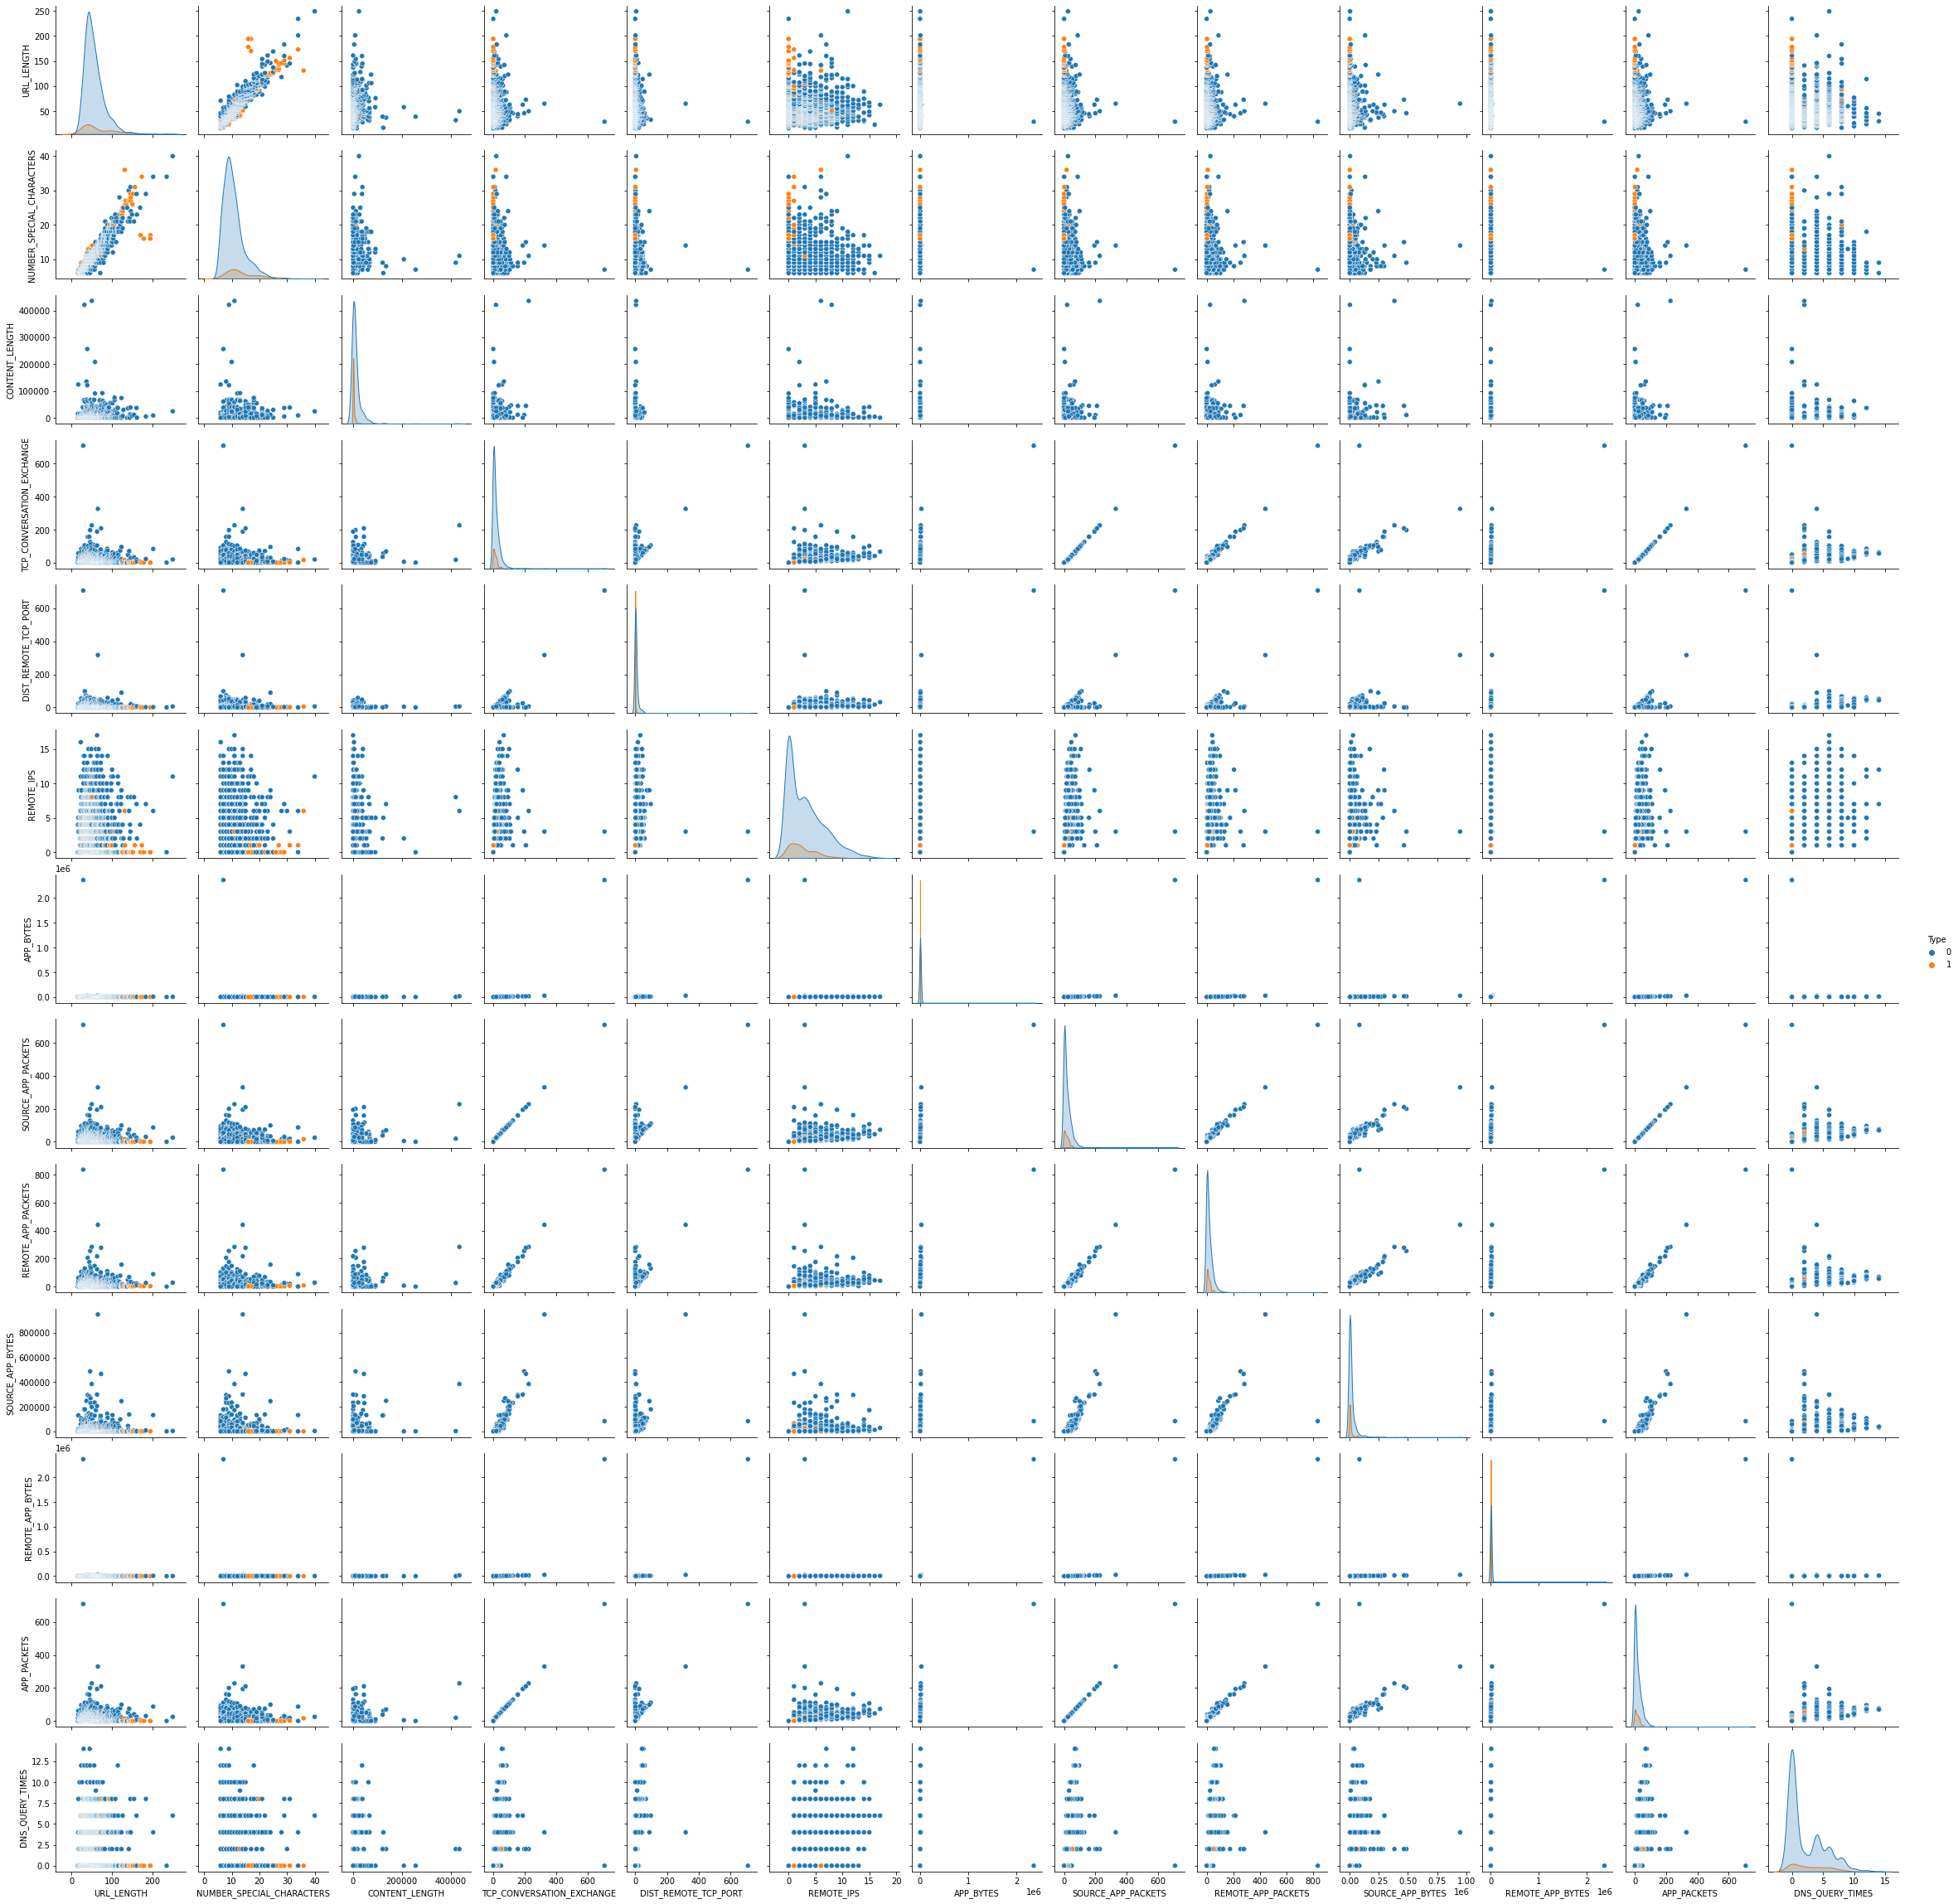

In [7]:
# takes a bit long to run
sns.pairplot(df_train, hue='Type')


# Feature analysis and engineering  <a class="anchor" id="fourth-section"></a>

## Formatting datetime columns
Original datetime columns have different string formats. Also they contain non-datetime values that need to be processed. We use string-length of datetime values to differentiate between formats and to find non-datetime values.

In [8]:
df_train[['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']].head()


WHOIS_REGDATE WHOIS_UPDATED_DATE
0             None               None
1             None               None
2   7/10/1997 4:00    12/09/2013 0:45
3  12/05/1996 0:00    11/04/2017 0:00
4  3/08/2016 14:30     3/10/2016 3:45

In [9]:
df_train['WHOIS_REGDATE'].apply(lambda x: len(x)).value_counts()


15    939
14    365
4      89
16     30
22      5
1       3
Name: WHOIS_REGDATE, dtype: int64

In [10]:
df_train['WHOIS_UPDATED_DATE'].apply(lambda x: len(x)).value_counts()


15    843
14    384
16    103
4      96
22      5
Name: WHOIS_UPDATED_DATE, dtype: int64

In [11]:
non_date_values = set([s for s in df_train.WHOIS_REGDATE.values if len(s) < 6])
non_date_values = non_date_values.union(
    set([s for s in df_train.WHOIS_UPDATED_DATE.values if len(s) < 6]))
print(non_date_values)


{'0', 'b', 'None'}


There are basically two date formats in the columns: `'%Y-%m-%dT%H:%M:%S.0Z'` and `'%d/%m/%Y %H:%M'`. The last one should always have length 16 to be properly read by the `pd.to_datetime()` function, but there are values with length 14 and 15. Values that have length 1 or 4 are missing values. We need to transform the date values to have correct string format.

In [12]:
def transform_dates(df, col):
    """
    Transforms date values from different string formats to '%d/%m/%Y %H:%M'.
    Uses string length of a given value as the basic parameter.
    Input: dataframe and name of the column to be transformed.
    Returns: list of date values in '%d/%m/%Y %H:%M' format.

    Examples of possible input values '12/05/1996 0:00', '3/08/2016 14:30',
    '7/10/1997 4:00', '2017-03-07T22:02:38.0Z'. Other inputs will be defauled to
    '31/12/1960 23:59'.
    """
    new_date_vals = []
    for date in df[col]:
        if len(date) == 14:  # ex. '7/10/1997 4:00'
            day_ = '0' + date.split(' ')[0]
            time_ = '0' + date.split(' ')[1]
            date_ = day_ + ' '+time_
        elif len(date) == 15:  # ex. '12/05/1996 0:00', '3/08/2016 14:30'
            day_ = date.split(' ')[0]
            time_ = date.split(' ')[1]
            if len(time_) == 4:  # ex. 0:00
                time_ = '0' + time_
            else:
                day_ = '0' + day_
            date_ = day_ + ' '+time_
        elif len(date) == 22:  # ex. '2017-03-07T22:02:38.0Z'
            date_ = date[8:10]+'/'+date[5:7]+'/'+date[:4]+' '+date[11:16]
        elif len(date) == 16:  # ex. '12/09/2013 0:45', these should not be changed
            date_ = date
        else:
            date_ = '31/12/1960 23:59'
        new_date_vals.append(date_)
    df[col+'_TS'] = pd.to_datetime(new_date_vals)


In [13]:
transform_dates(df=df_train, col='WHOIS_REGDATE')
transform_dates(df=df_train, col='WHOIS_UPDATED_DATE')


Original columns with date values contain missing values. They are transformed by the `transform_dates()` function into `1969-12-31 23:59:00`. However, one should not forget that these values were obtained from missing ones. One possible way to handle this is to create a new column that would indicate whether a respective original date column has a missing value.

In [14]:
# having a look at theoriginal and modified date columns
date_cols = ['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE',
             'WHOIS_REGDATE_TS', 'WHOIS_UPDATED_DATE_TS']
df_train[date_cols].head()


WHOIS_REGDATE WHOIS_UPDATED_DATE    WHOIS_REGDATE_TS  \
0             None               None 1960-12-31 23:59:00   
1             None               None 1960-12-31 23:59:00   
2   7/10/1997 4:00    12/09/2013 0:45 1997-07-10 04:00:00   
3  12/05/1996 0:00    11/04/2017 0:00 1996-12-05 00:00:00   
4  3/08/2016 14:30     3/10/2016 3:45 2016-03-08 14:30:00   

  WHOIS_UPDATED_DATE_TS  
0   1960-12-31 23:59:00  
1   1960-12-31 23:59:00  
2   2013-12-09 00:45:00  
3   2017-11-04 00:00:00  
4   2016-03-10 03:45:00

In [15]:
# number of missing values in the date columns
# these should be taken into account as well
(df_train[['WHOIS_REGDATE_TS', 'WHOIS_UPDATED_DATE_TS']]
 == '1960-12-31 23:59:00').sum()


WHOIS_REGDATE_TS         92
WHOIS_UPDATED_DATE_TS    96
dtype: int64

## Choosing columns to model with

In this section, we would like to make a preliminary selection of columns. The decision whether to drop a column from further consideration will be based on practical reasons such as:
- column contains either too many or too few unique values
- column contains many missing values
- column contains a lot of unstructured text
- categorical column contains too many categories, and encoding leads to large memory usage
- numeric column correlates well with another column or columns

In [16]:
# list of columns, their data types, amount of missing values in float64-type columns
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   URL                        1431 non-null   object        
 1   URL_LENGTH                 1431 non-null   int64         
 2   NUMBER_SPECIAL_CHARACTERS  1431 non-null   int64         
 3   CHARSET                    1431 non-null   object        
 4   SERVER                     1430 non-null   object        
 5   CONTENT_LENGTH             786 non-null    float64       
 6   WHOIS_COUNTRY              1431 non-null   object        
 7   WHOIS_STATEPRO             1431 non-null   object        
 8   WHOIS_REGDATE              1431 non-null   object        
 9   WHOIS_UPDATED_DATE         1431 non-null   object        
 10  TCP_CONVERSATION_EXCHANGE  1431 non-null   int64         
 11  DIST_REMOTE_TCP_PORT       1431 non-null   int64         
 12  REMOTE

Having a look at the number of unique values in columns can also be interesting. It may help to decide which columns to remove from consideration, for example constant columns. 

Looking at the number of unique values in combination with the `target` column, can help to understand if columns have valuable information for distinguishing between `positives` and `negatives`. Here we can see that the column *CHARSET* has 9 unique values in total. Almost all unique values are present in both target classes.
On the other hand, the columns like *SERVER* may be good for differentiating between the target classes. They have many unique values, but only some of them are present in the `positive` class.

In [17]:
# unique values
d_unique_vals = {}
for col in df_train.columns.tolist():
    d_unique_vals[col] = df_train[col].nunique()

(df_train.groupby('Type').nunique().T.
 merge(pd.Series(d_unique_vals, name='unique_vals'),
       right_index=True, left_index=True)
 )


0    1  unique_vals
URL                        1272  159         1431
URL_LENGTH                  124   68          135
NUMBER_SPECIAL_CHARACTERS    26   24           29
CHARSET                       8    7            9
SERVER                      231   27          239
CONTENT_LENGTH              500   48          540
WHOIS_COUNTRY                42   21           49
WHOIS_STATEPRO              164   36          182
WHOIS_REGDATE               720   54          769
WHOIS_UPDATED_DATE          519   49          542
TCP_CONVERSATION_EXCHANGE    96   38           96
DIST_REMOTE_TCP_PORT         64    8           64
REMOTE_IPS                   18   10           18
APP_BYTES                   608  100          692
SOURCE_APP_PACKETS          108   42          108
REMOTE_APP_PACKETS          110   38          110
SOURCE_APP_BYTES            644  103          738
REMOTE_APP_BYTES            598  102          686
APP_PACKETS                 108   42          108
DNS_QUERY_TIMES               9    5            9
WHOIS_REGDATE_TS            719   53          767
WHOIS_UPDATED_DATE_TS       519   49          542

### Categorical features

There are 7 string-based columns in the dataset.

In [18]:
df_train.select_dtypes(exclude=['number', 'datetime'])


URL     CHARSET                  SERVER WHOIS_COUNTRY  \
0     B0_2314       UTF-8           Apache/2.4.10          None   
1      B0_911    us-ascii   Microsoft-HTTPAPI/2.0          None   
2      B0_113  ISO-8859-1                   nginx            US   
3      B0_403       UTF-8                    None            US   
4     B0_2064       UTF-8                   nginx            SC   
...       ...         ...                     ...           ...   
1426    M4_45       UTF-8                  Apache            ES   
1427    M4_48       UTF-8                  Apache            ES   
1428   B0_162       utf-8  Apache/2.2.16 (Debian)            US   
1429  B0_1152  ISO-8859-1        cloudflare-nginx            US   
1430   B0_676       utf-8       Microsoft-IIS/8.5            US   

     WHOIS_STATEPRO    WHOIS_REGDATE WHOIS_UPDATED_DATE  
0              None             None               None  
1              None             None               None  
2                AK   7/10/1997 4:00    12/09/2013 0:45  
3                TX  12/05/1996 0:00    11/04/2017 0:00  
4              Mahe  3/08/2016 14:30     3/10/2016 3:45  
...             ...              ...                ...  
1426      Barcelona  17/09/2008 0:00     2/09/2016 0:00  
1427      Barcelona  17/09/2008 0:00     2/09/2016 0:00  
1428             FL  15/02/1999 0:00    15/07/2015 0:00  
1429             CA   1/04/1998 0:00     9/12/2016 0:00  
1430      Wisconsin  14/11/2008 0:00    20/11/2013 0:00  

[1431 rows x 7 columns]

The colunm *URL* has as many values as the rows. Therefore we will treat this column as the index and will not use it for modell training. 

We will not use *WHOIS_REGDATE* and *WHOIS_UPDATED_DATE* columns further. We found a way how to format them into datetime: *WHOIS_REGDATE_TS* and *WHOIS_UPDATED_DATE_TS*. However, in the new datasets these columns may have values that are not covered by our formatting. Therefore using them may lead to faults.

In [19]:
df_train['URL'].nunique()


1431

*CHARSET* has both lowercase and uppercase versions values same values. It contains in fact 7 unique values. If we will use this column, we will make an uppercase varsion of it, one-hot-encode it and ignore unseen new values.

In [20]:
df_train['CHARSET'].str.upper().value_counts()


UTF-8           837
ISO-8859-1      461
US-ASCII        124
NONE              6
WINDOWS-1251      1
ISO-8859          1
WINDOWS-1252      1
Name: CHARSET, dtype: int64

In [21]:
df_train.groupby('Type')['CHARSET'].value_counts().unstack().T


Type              0     1
CHARSET                  
ISO-8859        1.0   NaN
ISO-8859-1    311.0  39.0
None            5.0   1.0
UTF-8         448.0  92.0
iso-8859-1    101.0  10.0
us-ascii      121.0   3.0
utf-8         284.0  13.0
windows-1251    NaN   1.0
windows-1252    1.0   NaN

*SERVER* contains many different values that are very unstructured. One could use the length of the servername or another representation of this feature.

In [22]:
df_train['SERVER_LENGTH'] = df_train['SERVER'].apply(lambda x: len(str(x)))


In [23]:
df_train['SERVER'].sort_values().unique()


array(['.V01 Apache', '294', 'ATS', 'ATS/5.3.0',
       'Aeria Games & Entertainment', 'AkamaiGHost', 'AmazonS3', 'Apache',
       'Apache-Coyote/1.1',
       'Apache/1.3.27 (Unix)  (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b',
       'Apache/1.3.27 (Unix) PHP/4.4.1',
       'Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20',
       'Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8',
       'Apache/1.3.34 (Unix) PHP/4.4.4',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'Apache/1.3.39 (Unix) PHP/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a FrontPage/5.0.2.2635 DAV/1.0.3 mod_ssl/2.8.30 OpenSSL/0.9.7a',
       'Apache/1.3.42 Ben-SSL/1.60 (Unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 Chili!Soft-ASP/3.6.2 FrontPage/5.0.2.2635 mod_perl/1.31 PHP/4.4.9',
       'Apache/2', 'Apache/2.0.52 (Red Hat)',
       'Apache/2.0.63 (Unix) mod_ss

*WHOIS_COUNTRY* has both lowercase and uppercase versions values same values. There are in fact 44 unique values, 211 observations are missing the country.

In [24]:
df_train['WHOIS_COUNTRY'].sort_values().unique()
# {'UK': ["[U'GB'; U'UK']", "UNITED KINGDOM"],
#  'CY': "CYPRUS" }


array(['AE', 'AT', 'AU', 'BE', 'BR', 'BS', 'BY', 'CA', 'CH', 'CN', 'CZ',
       'Cyprus', 'DE', 'ES', 'FR', 'GB', 'HK', 'IE', 'IL', 'IN', 'IT',
       'JP', 'KG', 'KR', 'KY', 'LU', 'LV', 'NL', 'NO', 'None', 'PA', 'PH',
       'PK', 'RU', 'SC', 'SE', 'SI', 'TH', 'TR', 'UA', 'UG', 'UK', 'US',
       'UY', 'United Kingdom', "[u'GB'; u'UK']", 'ru', 'se', 'us'],
      dtype=object)

In [25]:
# 44 unique values if we exclude "[U'GB'; U'UK']", "UNITED KINGDOM"
df_train['WHOIS_COUNTRY'].str.upper().nunique()


46

In [26]:
df_train['WHOIS_COUNTRY'].str.upper().value_counts()


US                899
NONE              211
CA                 76
ES                 42
AU                 30
GB                 17
PA                 15
JP                 11
CN                 10
IN                 10
CZ                  8
UK                  8
FR                  6
NL                  6
CH                  6
RU                  6
[U'GB'; U'UK']      5
KR                  5
AT                  4
BS                  4
PH                  4
SE                  4
KY                  3
TR                  3
SC                  3
DE                  3
HK                  3
BE                  3
KG                  2
CYPRUS              2
UY                  2
BR                  2
IL                  2
UA                  2
NO                  2
SI                  2
IE                  1
AE                  1
BY                  1
LV                  1
IT                  1
PK                  1
LU                  1
TH                  1
UG                  1
UNITED KIN

*WHOIS_STATEPRO* is very mixed. It would be difficult to use it directly for modelling. However, one could create new features using some hasing techniques, as in [link](https://www.kaggle.com/evgenyparenchenkov/svm-catboost-and-a-couple-of-new-features).

In [27]:
df_train['WHOIS_STATEPRO'].sort_values().unique()


array(['-', '--', '6110021', 'AB', 'AK', 'AL', 'ALABAMA', 'ALBERTA',
       'ANTWERP', 'AZ', 'Alabama', 'Alicante', 'Andhra Pradesh',
       'Arizona', 'Arkansas', 'Austria', 'BC', 'Barcelona', 'Bei Jing',
       'Berlin', 'British Columbia', 'CA', 'CALIFORNIA', 'CH', 'CO',
       'CO. DUBLIN', 'CT', 'California', 'Central', 'Colorado',
       'Connecticut', 'DC', 'DE', 'District of Columbia', 'Dubai', 'FL',
       'FLORIDA', 'Florida', 'Fukuoka', 'GA', 'GRAND CAYMAN',
       'Greater London', 'HANTS', 'HR', 'Haryana', 'IL',
       'ILOCOS NORTE R3', 'INDAL', 'Illinois', 'Indiana', 'KG', 'KS',
       'Kansas', 'Karnataka', 'Kentucky', 'Krasnoyarsk', 'LA', 'London',
       'MA', 'MAHARASHTR', 'MAINE', 'MB', 'MD', 'ME', 'MH', 'MI',
       'MIDDLESEX', 'MO', 'MOSCOW', 'Maharashtra', 'Mahe', 'Maine',
       'Manila', 'Manitoba', 'Maryland', 'Massachusetts', 'Metro Manila',
       'Michigan', 'Minnesota', 'Missouri', 'Montevideo', 'NC',
       'NEW SOUTH WALES', 'NEW YORK', 'NH', 'NJ', 'NON

In [28]:
usable_categorical_columns = ['WHOIS_COUNTRY']


### Numeric features

There are 14 numeric columns, including new feature *SERVER_LENGTH*, and 1 target column.

In [29]:
df_train.select_dtypes(include=['number'])


URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
0             16                          6         15087.0   
1             16                          6           324.0   
2             17                          6           162.0   
3             17                          6        124140.0   
4             18                          7             NaN   
...          ...                        ...             ...   
1426         194                         17             NaN   
1427         194                         16             NaN   
1428         201                         34          8904.0   
1429         234                         34             NaN   
1430         249                         40         24435.0   

      TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0                            17                     7           4       1230   
1                             0                     0           0          0   
2                            31                    22           3       3812   
3                            57                     2           5       4278   
4                            11                     6           9        894   
...                         ...                   ...         ...        ...   
1426                          0                     0           0          0   
1427                          0                     0           0          0   
1428                         83                     2           6       6631   
1429                          0                     0           0          0   
1430                         19                     6          11       2314   

      SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
0                     17                  19              1265   
1                      0                   0                 0   
2                     39                  37             18784   
3                     61                  62            129889   
4                     11                  13               838   
...                  ...                 ...               ...   
1426                   0                   3               186   
1427                   0                   3               186   
1428                  87                  89            132181   
1429                   0                   0                 0   
1430                  25                  28              3039   

      REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  SERVER_LENGTH  
0                 1230           17              0.0     0             13  
1                    0            0              0.0     0             21  
2                 4380           39              8.0     0              5  
3                 4586           61              4.0     0              4  
4                  894           11              0.0     0              5  
...                ...          ...              ...   ...            ...  
1426                 0            0              0.0     1              6  
1427                 0            0              0.0     1              6  
1428              6945           87              4.0     0             22  
1429                 0            0              0.0     0             16  
1430              2776           25              6.0     0             17  

[1431 rows x 15 columns]

In [30]:
# list of numeric columns
numeric_columns = df_train.select_dtypes(include=['number']).columns.tolist()


#### Correlation

Let us have a look at their correlation. 

As we can see there are some very correlated columns like *APP_PACKETS* and *DIST_REMOTE_TCP_PORT*. Here we consider linear correlation. In general, correlated features should not be used in model training, especially for linear models like `Logistic Regression`. However, for tree-based methods correlation is not a big problem. 

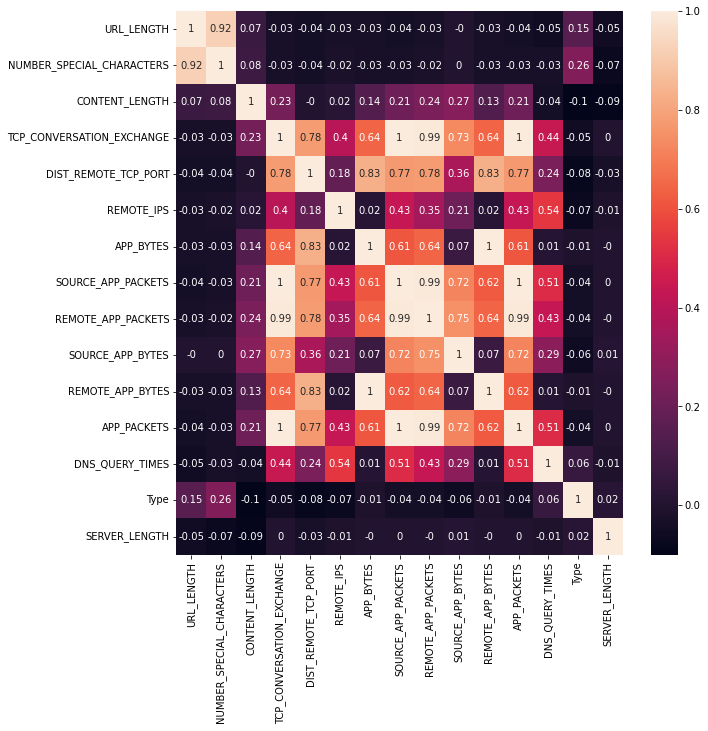

In [31]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_train[numeric_columns].corr().round(2), annot=True, fmt='g')
plt.show()


Setting some upper bound on correlation between features can be a good idea. If one of two correlated columns is used, the other one should not.

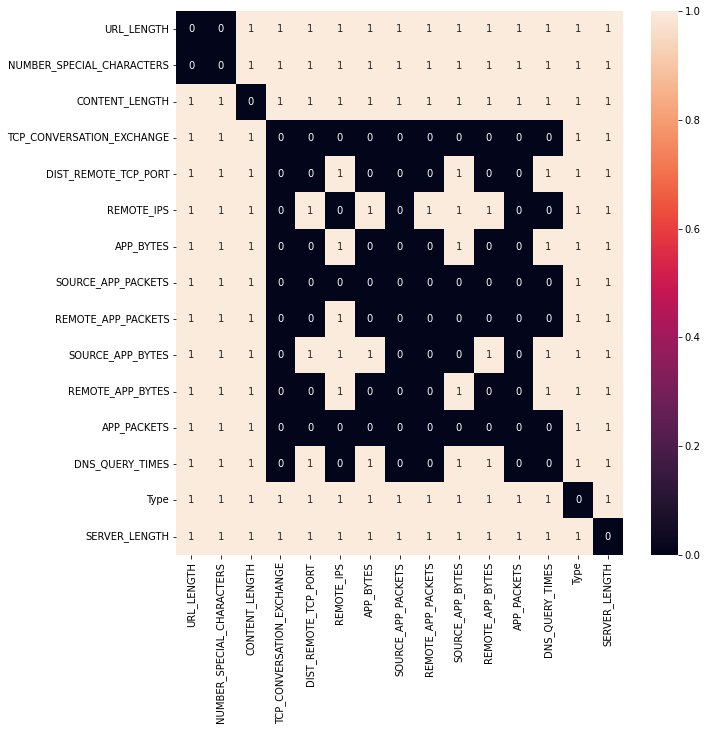

In [32]:
# Looking at numeric columns where absolute values of correlation are smaller than 0.4.
# In this representation, it is easier to see which columns should not be used together
# because of correlation. For example, 'URL_LENGTH' should not be use with 'NUMBER_SPECIAL_CHARACTERS'.

fig = plt.figure(figsize=(10, 10))
sns.heatmap((df_train[numeric_columns].corr().round(
    2).abs() < 0.4), annot=True, fmt='g')
plt.show()


Based on this correlation heatmap, one can decide to use *NUMBER_SPECIAL_CHARACTERS*, *REMOTE_IPS*, *SOURCE_APP_BYTES*, *REMOTE_APP_BYTES*, *SERVER_LENGTH* together because they do not correlate too much. *CONTENT_LENGTH* can also be in this list, but it has too many missing values.

In [33]:
usable_numeric_columns = ['NUMBER_SPECIAL_CHARACTERS', 'REMOTE_IPS',
                          'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'SERVER_LENGTH']


#### Distribution

Numeric columns in the dataset have diverse ranges and distributions. Transformations like `Standard Scaling` and `Normalization` should be made when using these columns for modelling. We also can see that distributions for `positive` and `negative` classes to not differ a lot. It may be interesting to try polynomial transformation for these features and see how they would behave as predictors.

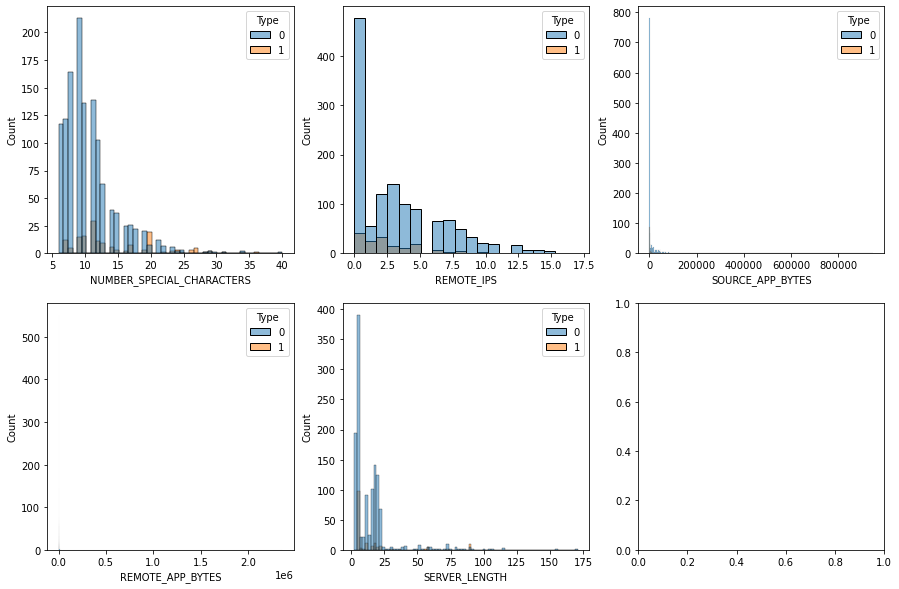

In [34]:
# takes a bit long to run
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(usable_numeric_columns):
    sns.histplot(df_train, x=col, hue='Type', ax=ax[i])


### Datetime features

ML algorithms implemented in `scikit-learn` do not process datetime values. They need to be transformed into `numeric` format. Also one could deduce the day and month values from these features, and analyse if they do give any improvement for a model's predictive power.

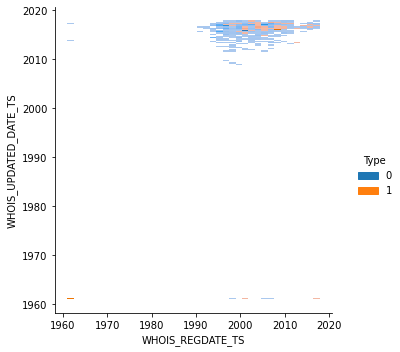

In [35]:
sns.displot(df_train, x='WHOIS_REGDATE_TS',
            y='WHOIS_UPDATED_DATE_TS', hue='Type')


In [36]:
# converting dates to int
df_train['WHOIS_REGDATE_INT'] = df_train['WHOIS_REGDATE_TS'].view(int)
df_train['WHOIS_UPDATED_DATE_INT'] = df_train['WHOIS_UPDATED_DATE_TS'].view(
    int)

# extracting month values
df_train['WHOIS_REGDATE_MONTH'] = df_train['WHOIS_REGDATE_TS'].dt.month
df_train['WHOIS_UPDATED_DATE_MONTH'] = df_train['WHOIS_UPDATED_DATE_TS'].dt.month

# extracting day values
df_train['WHOIS_REGDATE_DAY'] = df_train['WHOIS_REGDATE_TS'].dt.day
df_train['WHOIS_UPDATED_DATE_DAY'] = df_train['WHOIS_UPDATED_DATE_TS'].dt.day


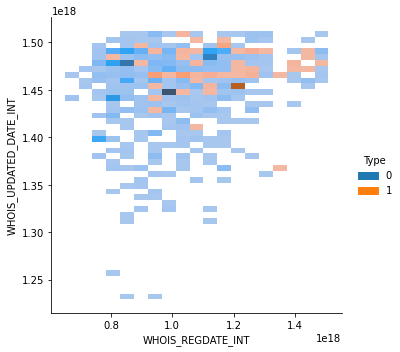

In [37]:
# this plot is a scatterplot of two features where dots are colored after the 'Type' variable
sns.displot(df_train.query('WHOIS_REGDATE_INT>0 and WHOIS_UPDATED_DATE_INT>0'),
            x='WHOIS_REGDATE_INT', y='WHOIS_UPDATED_DATE_INT', hue='Type')


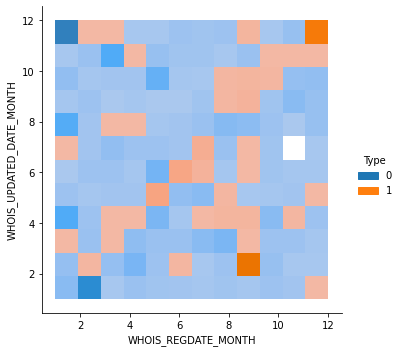

In [38]:
# this plot is a scatterplot of two features where dots are colored after the 'Type' variable
sns.displot(df_train, x='WHOIS_REGDATE_MONTH',
            y='WHOIS_UPDATED_DATE_MONTH', hue='Type')


Looking at linear correlation between deduced columns and the target. 

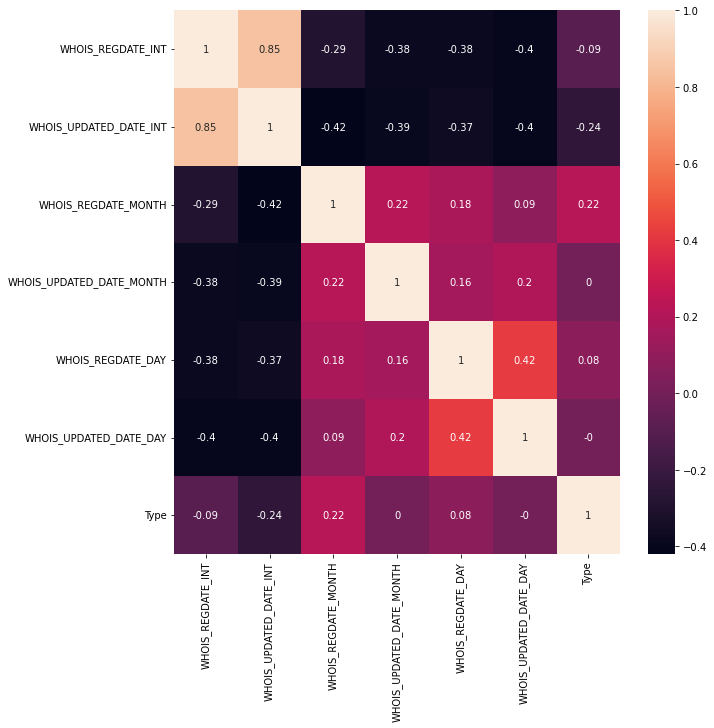

In [39]:
deduced_date_columns = ['WHOIS_REGDATE_INT', 'WHOIS_UPDATED_DATE_INT', 'WHOIS_REGDATE_MONTH',
                        'WHOIS_UPDATED_DATE_MONTH', 'WHOIS_REGDATE_DAY', 'WHOIS_UPDATED_DATE_DAY']
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_train[deduced_date_columns+['Type']
                     ].corr().round(2), annot=True, fmt='g')
plt.show()


The columns *SOURCE_APP_BYTES* and *REMOTE_APP_BYTES* have too large values. Therefore it could be relevant to use the `log()` function on them. To avoid getting `-inf` on zeros in the coulmns, we could shift them by adding 1. 

In [40]:
bytes_cols = []
for col in ['SOURCE_APP_BYTES', 'REMOTE_APP_BYTES']:
    df_train[col+'_LOG'] = (df_train[col]+1).apply(np.log)
    bytes_cols.append(col+'_LOG')


### Columns to drop 
- *URL*, *WHOIS_REGDATE*, *WHOIS_UPDATED_DATE* have been discussed before.
- *CONTENT_LENGTH* has too many missing values and it correlates with several other columns. Therefore I choose to drop it. 
- *CHARSET*, *DNS_QUERY_TIMES* too few unique values.
- *WHOIS_STATEPRO*, *SERVER* have too many unstructured values.
- We drop *URL_LENGTH* because correlates well with *NUMBER_SPECIAL_CHARACTERS* and the latter has better correlation with the target. 

We will also avoid using datetime columns here. Because their values may not be transformed appropriately and throw errors. This will also make our dataset transformation pipeline easier. 


In [41]:
drop_columns = ['URL', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'CONTENT_LENGTH', 'CHARSET', 'DNS_QUERY_TIMES', 'WHOIS_STATEPRO', 'SERVER',
                'URL_LENGTH']


In [42]:
df_train.drop(columns=drop_columns)


NUMBER_SPECIAL_CHARACTERS WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  \
0                             6          None                         17   
1                             6          None                          0   
2                             6            US                         31   
3                             6            US                         57   
4                             7            SC                         11   
...                         ...           ...                        ...   
1426                         17            ES                          0   
1427                         16            ES                          0   
1428                         34            US                         83   
1429                         34            US                          0   
1430                         40            US                         19   

      DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                        7           4       1230                  17   
1                        0           0          0                   0   
2                       22           3       3812                  39   
3                        2           5       4278                  61   
4                        6           9        894                  11   
...                    ...         ...        ...                 ...   
1426                     0           0          0                   0   
1427                     0           0          0                   0   
1428                     2           6       6631                  87   
1429                     0           0          0                   0   
1430                     6          11       2314                  25   

      REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  ...  \
0                     19              1265              1230  ...   
1                      0                 0                 0  ...   
2                     37             18784              4380  ...   
3                     62            129889              4586  ...   
4                     13               838               894  ...   
...                  ...               ...               ...  ...   
1426                   3               186                 0  ...   
1427                   3               186                 0  ...   
1428                  89            132181              6945  ...   
1429                   0                 0                 0  ...   
1430                  28              3039              2776  ...   

      WHOIS_UPDATED_DATE_TS  SERVER_LENGTH    WHOIS_REGDATE_INT  \
0       1960-12-31 23:59:00             13  -283996860000000000   
1       1960-12-31 23:59:00             21  -283996860000000000   
2       2013-12-09 00:45:00              5   868507200000000000   
3       2017-11-04 00:00:00              4   849744000000000000   
4       2016-03-10 03:45:00              5  1457447400000000000   
...                     ...            ...                  ...   
1426    2016-02-09 00:00:00              6  1221609600000000000   
1427    2016-02-09 00:00:00              6  1221609600000000000   
1428    2015-07-15 00:00:00             22   919036800000000000   
1429    2016-09-12 00:00:00             16   883872000000000000   
1430    2013-11-20 00:00:00             17  1226620800000000000   

     WHOIS_UPDATED_DATE_INT  WHOIS_REGDATE_MONTH  WHOIS_UPDATED_DATE_MONTH  \
0       -283996860000000000                   12                        12   
1       -283996860000000000                   12                        12   
2       1386549900000000000                    7                        12   
3       1509753600000000000                   12                        11   
4       1457581500000000000                    3                         3   
...                     ...                  ...                       ...   
1426    1454976000000000000         

### Columns to use 

The way we chose these columns is not advanced in any way. One could use statistical tests, weights of evidence or other sophisticated methods. However, this is a simple approach that can work fine in this project. 

In [43]:
use_columns = ['WHOIS_COUNTRY',
               'NUMBER_SPECIAL_CHARACTERS',
               'REMOTE_IPS',
               'SERVER_LENGTH',
               'SOURCE_APP_BYTES_LOG',
               'REMOTE_APP_BYTES_LOG'
               ]


# Splitting data into train, validation and test datasets <a class="anchor" id="fith-section"></a>

Since the dataset is not very large we will only holdout 20% (287 observations) of if for test. The rest of it, 1144 observations, will be used for training with cross-validation.

In [44]:
from sklearn.model_selection import train_test_split
X = df_train[use_columns]
y = df_train['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=0)


In [45]:
X_train.shape


(1144, 6)

In [46]:
X


WHOIS_COUNTRY  NUMBER_SPECIAL_CHARACTERS  REMOTE_IPS  SERVER_LENGTH  \
0             None                          6           4             13   
1             None                          6           0             21   
2               US                          6           3              5   
3               US                          6           5              4   
4               SC                          7           9              5   
...            ...                        ...         ...            ...   
1426            ES                         17           0              6   
1427            ES                         16           0              6   
1428            US                         34           6             22   
1429            US                         34           0             16   
1430            US                         40          11             17   

      SOURCE_APP_BYTES_LOG  REMOTE_APP_BYTES_LOG  
0                 7.143618              7.115582  
1                 0.000000              0.000000  
2                 9.840814              8.385032  
3                11.774443              8.430981  
4                 6.732211              6.796824  
...                    ...                   ...  
1426              5.231109              0.000000  
1427              5.231109              0.000000  
1428             11.791935              8.845921  
1429              0.000000              0.000000  
1430              8.019613              7.929126  

[1431 rows x 6 columns]

In [47]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WHOIS_COUNTRY              1431 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1431 non-null   int64  
 2   REMOTE_IPS                 1431 non-null   int64  
 3   SERVER_LENGTH              1431 non-null   int64  
 4   SOURCE_APP_BYTES_LOG       1431 non-null   float64
 5   REMOTE_APP_BYTES_LOG       1431 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 67.2+ KB


# Model training <a class="anchor" id="sixth-section"></a>

- We will first create a column transformer object that will process chosen numeric and categorical features. Other columns will be excluded. 
- Then we will create a model training pipeline, where the classifier model will be attached as the last step It is required by the `scikit-learn` implementation.
- We will then create a list of hyper-parameters and candidate values for a chosen model. This list will be used in the grid search method with repeated stratified k-fold cross-validation. The fact that we use column transformer in this process allows us to avoid data leakage from validation folds. 

We will test with `Logistic Regression` and `Decition Tree Classifier`. These models have completely different algorithms, so it is interesting how they would perform on the training and test data.

#### Column Transformation

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer

# chossing numeric features to process
numeric_features = ['NUMBER_SPECIAL_CHARACTERS',
                    'REMOTE_IPS',
                    'SERVER_LENGTH',
                    'SOURCE_APP_BYTES_LOG',
                    'REMOTE_APP_BYTES_LOG'
                    ]

# creating a pipeline for numeric features:
# adding SimpleImputer for a case if there will be a missing value in new datasets
# then standard scaling will be used to modify the distribution of values
# also normalization of numeric features is done for reducing the range of values
# at the end we add Polynomial features with default parameters
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler()),
           ("normalizer", Normalizer()),
           ("polyfeature", PolynomialFeatures(degree=2, interaction_only=False))
           ]
)

# choosing categorical features:
# values will be one-hot encoded, unseen values will be ignored
categorical_features = ['WHOIS_COUNTRY']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# creating the ColumnTransformer that will process
# the chosen features in the training dataset
# other columns will be dropped
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='drop'
)


## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# append classifier to preprocessing pipeline, now we have a full model training pipeline
# the fixed hyper-parameters for the classifier model can be given here
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("logistic", LogisticRegression(random_state=0, max_iter=1000, n_jobs=-1))]
)

# hyper-parameters for running the grid search over
# these are regularization method ('penalty') and its power ('C')
# also class_weight for taking into account the unbalanced target
param_grid = {
    "logistic__penalty": ['l1', 'l2', 'elasticnet'],
    "logistic__C": [0.1, 0.25, 0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    "logistic__class_weight": [None, 'balanced']
}

# stratified k-fold cross validation object
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)

# grid search for finding best hyper-parameters for the model
# scoring can be 'accuracy', 'f1_micro' or others
# we choose 'f1_micro' because the metric should take into account the unbalanced target
search = GridSearchCV(pipe, param_grid, cv=rskf, scoring='f1_micro', n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.928):
{'logistic__C': 10.0, 'logistic__class_weight': None, 'logistic__penalty': 'l2'}


In [50]:
logistic_regression = search.best_estimator_
# fitting the model with best hyper-parameters on the full training dataset
logistic_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('normalizer',
                                                                   Normalizer()),
                                                                  ('polyfeature',
                                                                   PolynomialFeatures())]),
                                                  ['NUMBER_SPECIAL_CHARACTERS',
                                                   'REMOTE_IPS',
                                                   'SERVER_LENGTH',
                 

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

# append classifier to preprocessing pipeline, now we have a full model training pipeline
# the fixed hyper-parameters for the classifier model can be given here
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("decision_tree", DecisionTreeClassifier(random_state=0))]
)

# hyper-parameters for running the grid search over
# the basic parameter here is max_depth that controls tree depth
# and min_samples_split works as a regularization parameter for avoiding overfitting
# class_weight takes into account the unbalanced target

param_grid = {"decision_tree__max_depth": [3, 5, 7],
              "decision_tree__criterion": ["gini", "entropy"],
              "decision_tree__min_samples_split": [6, 10, 16],
              "decision_tree__class_weight": [None, "balanced"]
              }

# grid search for finding best hyper-parameters for the model
# scoring can be 'accuracy', 'f1_micro' or others
# we choose 'f1_micro' because the metric should take into account the unbalanced target
search = GridSearchCV(pipe, param_grid, cv=rskf, scoring='f1_micro', n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.923):
{'decision_tree__class_weight': None, 'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 5, 'decision_tree__min_samples_split': 6}


In [52]:
dt_classifier = search.best_estimator_

# fitting the model with best hyper-parameters on the full training dataset
dt_classifier.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('normalizer',
                                                                   Normalizer()),
                                                                  ('polyfeature',
                                                                   PolynomialFeatures())]),
                                                  ['NUMBER_SPECIAL_CHARACTERS',
                                                   'REMOTE_IPS',
                                                   'SERVER_LENGTH',
                 

# Model evaluation <a class="anchor" id="seventh-section"></a>

#### ROC curves and AUC

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve


def plot_roc_curves(clf, modelname: str = 'Model'):
    """ The function plots the ROC curves for training and test data.
        Large difference between the two curves indicates that the given model overfits.
        X_train, X_test, y_train, y_test must be present in the environment.
        Input: 
            clf: trained classifier model object
            modelname: string value with models name 
        Ouput:
            matplotlib plot with ROC curves 
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    plot_roc_curve(clf, X_test, y_test, ax=ax,
                   name='Test', lw=4, ls='--', c='r')
    plot_roc_curve(clf, X_train, y_train, ax=ax,
                   name='Train', lw=4, ls='-', c='b')
    ax.set_title('ROC curve: '+modelname, fontsize=22)
    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)
    plt.tight_layout()
    plt.legend(loc=4, fontsize=20)
    plt.show()


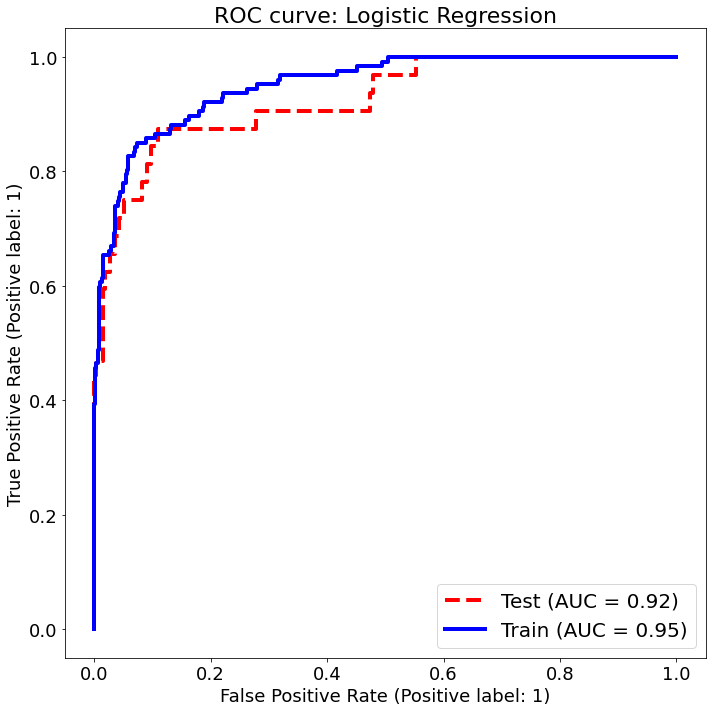

In [54]:
plot_roc_curves(logistic_regression, modelname='Logistic Regression')


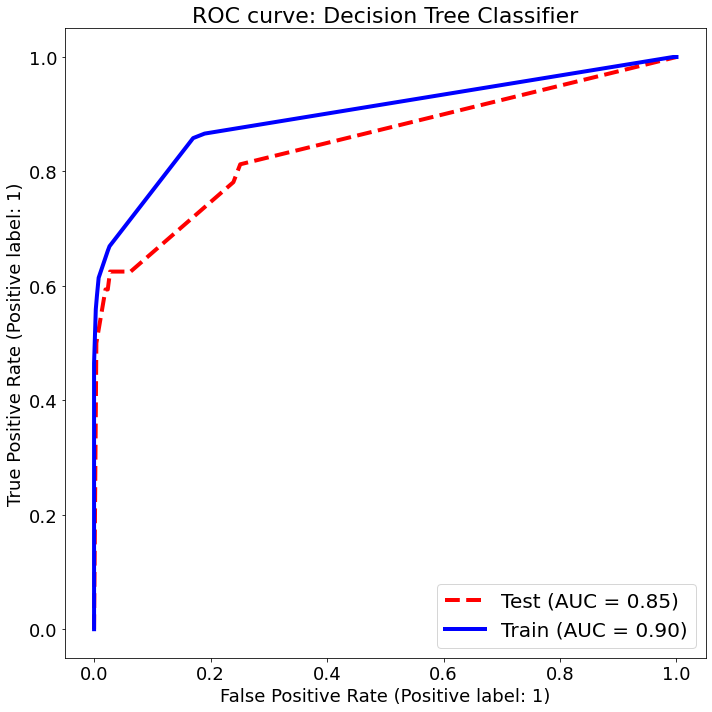

In [55]:
plot_roc_curves(dt_classifier, modelname='Decision Tree Classifier')


#### Classification report

We can print out different classification model performance metrics. 
Here we see that `recall` and `f1-score` for the `positive` class are not very good. This should be because of imbalanced target.

In [56]:
y_pred = logistic_regression.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       255
           1       0.81      0.53      0.64        32

    accuracy                           0.93       287
   macro avg       0.88      0.76      0.80       287
weighted avg       0.93      0.93      0.93       287



In [57]:
y_pred = dt_classifier.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       255
           1       0.74      0.62      0.68        32

    accuracy                           0.93       287
   macro avg       0.85      0.80      0.82       287
weighted avg       0.93      0.93      0.93       287



#### Confusion matrix

The same can be confirmed with the confusion matrix plots: the model gives too many false negatives.

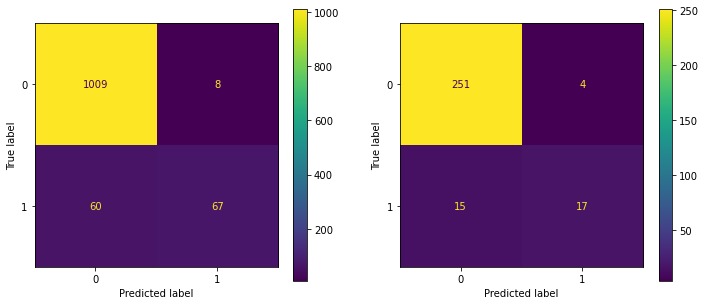

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(estimator=logistic_regression,
                      X=X_train, y_true=y_train, ax=ax[0])
plot_confusion_matrix(estimator=logistic_regression,
                      X=X_test, y_true=y_test, ax=ax[1])


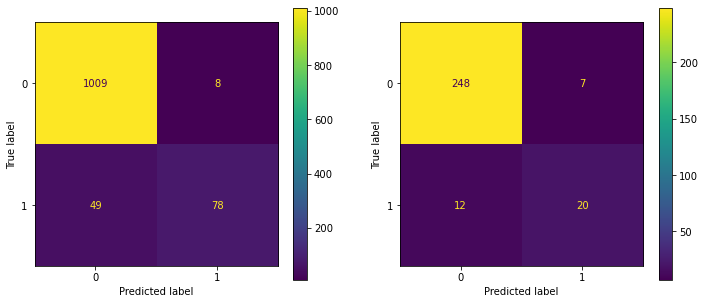

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(estimator=dt_classifier, X=X_train,
                      y_true=y_train, ax=ax[0])
plot_confusion_matrix(estimator=dt_classifier,
                      X=X_test, y_true=y_test, ax=ax[1])


#### Conclusion

Decision Tree based model show a better performance in classifying malicious and benign websites. It has a better `Recall` and `f1-score` 
than those of Logistic Regression model. On `ROC` curves it is clear that tree-based model overfits more than logistic regression.
However, both models do predict many false negatives. This should be due to imbalanced target and the regularizations implemented in the algorithms could not manage it.

### Saving models

In [60]:
import joblib
models = {'dt_classifier': dt_classifier,
          'logistic_regression': logistic_regression}

joblib.dump(models, 'dictionary_of_trained_models.data')


['dictionary_of_trained_models.data']

# Prediction and saving results <a class="anchor" id="8-section"></a>

### Loading data

In [61]:
df_test = pd.read_csv("Test.csv",
                      header=0,
                      sep=",",
                      dtype=dtype_string_columns
                      )


### Preparing data for scoring

In [62]:
def prepare_data(df):
    df['SERVER_LENGTH'] = df['SERVER'].apply(lambda x: len(str(x)))
    bytes_cols = []
    for col in ['SOURCE_APP_BYTES', 'REMOTE_APP_BYTES']:
        df[col+'_LOG'] = (df[col]+1).apply(np.log)
        bytes_cols.append(col+'_LOG')
    return df


df_test = prepare_data(df_test)


In [63]:
df_test[use_columns]


WHOIS_COUNTRY  NUMBER_SPECIAL_CHARACTERS  REMOTE_IPS  SERVER_LENGTH  \
0              ES                         20           0              6   
1              US                         11           5              4   
2              US                          7          11              3   
3              US                          7          13              3   
4            None                         11           7             23   
..            ...                        ...         ...            ...   
345            US                         24           6              3   
346            CZ                         14           1              6   
347          None                          6           2              9   
348          None                         15           4              6   
349            US                          9           0              4   

     SOURCE_APP_BYTES_LOG  REMOTE_APP_BYTES_LOG  
0                5.231109              0.000000  
1                9.480215              8.666303  
2               11.060919              8.799963  
3               11.058134              8.774004  
4                7.934155              7.601402  
..                    ...                   ...  
345              9.975343              8.419801  
346             11.099302              8.189522  
347              6.093570              6.336826  
348              7.453562              7.421178  
349              0.000000              0.000000  

[350 rows x 6 columns]

### Predictions

In [64]:
import joblib
models = joblib.load('dictionary_of_trained_models.data')
dt_predictions = models['dt_classifier'].predict(df_test[use_columns])
lr_predictions = models['logistic_regression'].predict(df_test[use_columns])

pd.Series(dt_predictions).to_csv(
    'decision_tree_predictions_on_test_set.csv', index=False)
pd.Series(lr_predictions).to_csv(
    'logistic_regression_predictions_on_test_set.csv', index=False)


### Saving results with joblib

In [65]:
import joblib

results_to_save = {'prepared_data': df_test[use_columns],
                   'dt_classifier': dt_classifier,
                   'logistic_regression': logistic_regression,
                   'dt_predictions': dt_predictions,
                   'lr_predictions': lr_predictions}
joblib.dump(results_to_save, 'dictionary_of_results.data')


['dictionary_of_results.data']

### Loading results with joblib

In [66]:
import joblib

results = joblib.load("dictionary_of_results.data")
results.keys()


dict_keys(['prepared_data', 'dt_classifier', 'logistic_regression', 'dt_predictions', 'lr_predictions'])